In [1]:
import pandas as pd

# Replace 'your_dataset.csv' with the path to your dataset
df = pd.read_csv('CleanedGameStats.csv')
# Display the first few rows of the dataframe
df.head()


,Date,Home,Away,HomeWins,HPassCmp,APassCmp,HPassAtt,APassAtt,HPassPct,APassPct,...,HFGPercent,AFGPercent,HKickPts,AKickPts,HFum,AFum,HInt,AInt,HTotalTO,ATotalTO
0,9/4/2015,Georgia State,Charlotte,0,25,19,43,32,58.1,59.4,...,66.7,100.0,8,11,2,2,1,2,3,4
1,9/4/2015,Western Michigan,Michigan State,0,33,15,50,31,66.0,48.4,...,50.0,100.0,6,7,0,1,2,0,2,1
2,9/3/2015,Central Michigan,Oklahoma State,0,29,22,42,32,69.0,68.8,...,100.0,33.3,7,6,0,0,1,0,1,0
3,9/3/2015,Hawaii,Colorado,1,19,23,38,40,50.0,57.5,...,100.0,100.0,8,8,0,2,2,1,2,3
4,9/3/2015,Idaho,Ohio,0,36,20,48,25,75.0,80.0,...,100.0,50.0,8,9,1,1,2,0,3,1


datetime64[ns]


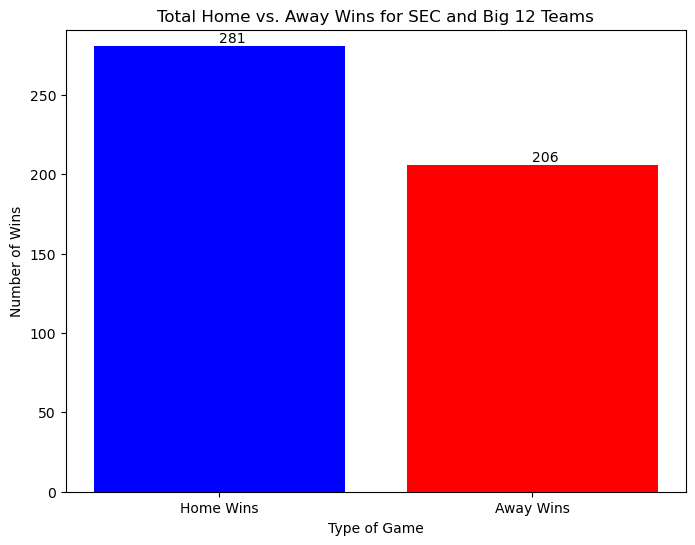

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv('CleanedGameStats.csv') 
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')  # Converts the 'Date' column to datetime, handling errors

# Check if the conversion worked and print out the dtype
print(df['Date'].dtype)  # Should output: datetime64[ns]

sec_teams = ['Alabama', 'Georgia', 'Florida', 'LSU', 'Missouri', 'Arkansas', 'Auburn', 'Vanderbilt', 'Mississippi', 'South Carolina', 'Tennessee', 'Kentucky', 'Ole Miss', 'Texas A&M']  
big12_teams = ['Texas', 'Oklahoma', 'Iowa State', 'Baylor', 'Oklahoma State', 'Kansas State', 'West Virginia', 'Kansas', 'Texas Tech', 'TCU', 'UCF', 'BYU', 'Houston', 'Cincinnati']  

# Filter the dataframe for games involving only these teams
filtered_df = df[(df['Home'].isin(sec_teams + big12_teams)) | (df['Away'].isin(sec_teams + big12_teams))]

# Calculating wins
home_wins = filtered_df['HomeWins'].sum()
away_wins = len(filtered_df) - home_wins  # Assuming HomeWins is 1 for home win, 0 for away win

# Plotting
plt.figure(figsize=(8, 6))
bars = plt.bar(['Home Wins', 'Away Wins'], [home_wins, away_wins], color=['blue', 'red'])
plt.xlabel('Type of Game')
plt.ylabel('Number of Wins')
plt.title('Total Home vs. Away Wins for SEC and Big 12 Teams')
plt.ylim(0, max(home_wins, away_wins) + 10)  # Add some space at the top for annotations

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom')  # va: vertical alignment

plt.show()

#Purpose: This bar chart compares the total number of wins at home versus wins away across all games involving SEC and Big 12 teams within the dataset.

#Representation:

#Bars: Two bars represent the total counts of wins— one for home wins and one for away wins.
#Colors: Different colors (blue for home, red for away) visually distinguish between the locations of the games.
#Annotations: Numbers on top of each bar show the exact count of wins, providing a clear, quantitative measure of the outcomes.
#Key Insight: This chart quickly shows which setting (home or away) generally results in more victories for these conferences, indicating possible home-field advantages or resilience in away games.



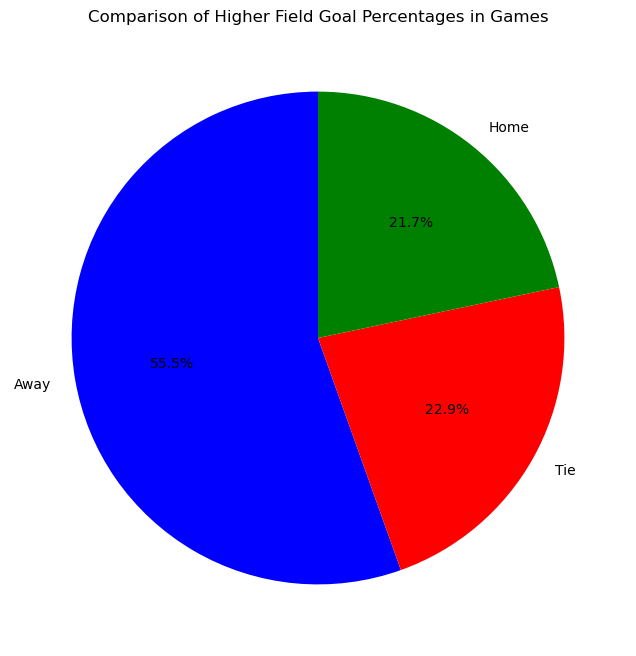

In [15]:
# Calculate which team had a higher FG% for each game
df['Higher FG%'] = (df['HFGPercent'] > df['AFGPercent']).map({True: 'Home', False: 'Away'})
# Add a third category for ties
df['Higher FG%'] = df.apply(lambda x: 'Tie' if x['HFGPercent'] == x['AFGPercent'] else x['Higher FG%'], axis=1)

# Count occurrences
fg_counts = df['Higher FG%'].value_counts()


# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(fg_counts, labels=fg_counts.index, autopct='%1.1f%%', startangle=90, colors=['blue', 'red', 'green'])
plt.title('Comparison of Higher Field Goal Percentages in Games')
plt.show()


#Pie Chart: Comparison of Higher Field Goal Percentages in Games
#Purpose:
#This pie chart is designed to provide a summary view of which teams (home vs. away) more frequently achieve higher field goal percentages in their games. It also includes instances where both teams have the same field goal percentage, noted as ties.

#Representation:

#Blue slice: Represents the proportion of games where the home team had a higher field goal percentage than the away team.
#Red slice: Represents the proportion of games where the away team had a higher field goal percentage than the home team.
#Green slice: Represents the proportion of games where both teams had the same field goal percentage.
#Labels and Percentages: Each slice is labeled with the category it represents, and the percentage of total games that fall into that category is displayed on the slice.
#Colors: Distinct colors (blue for home, red for away, green for ties) help quickly differentiate the results.
#Key Insight:
#The pie chart simplifies the comparison of field goal accuracy between home and away teams across all games, showing which setting typically sees better performance or if performances are often equal. This visualization helps in understanding the dominance or balance in field goal efficiency without delving into specific values or trends over time.

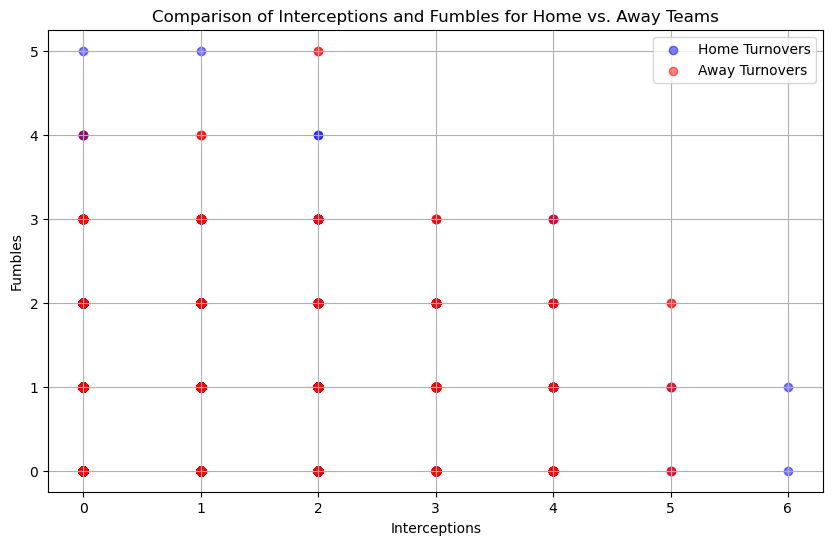

In [14]:
plt.figure(figsize=(10, 6))
plt.scatter(df['HInt'], df['HFum'], color='blue', alpha=0.5, label='Home Turnovers')
plt.scatter(df['AInt'], df['AFum'], color='red', alpha=0.5, label='Away Turnovers')
plt.xlabel('Interceptions')
plt.ylabel('Fumbles')
plt.title('Comparison of Interceptions and Fumbles for Home vs. Away Teams')
plt.legend()
plt.grid(True)
plt.show()

#Scatter Plot: Comparison of Interceptions and Fumbles for Home vs. Away Teams
#Purpose:
#This scatter plot aims to explore the relationship and distribution between interceptions and fumbles for both home and away teams, providing insights into how turnover-prone teams are under different conditions.

#Representation:

#Points: Each point on the plot represents a single game. The x-coordinate of a point represents the number of interceptions in that game, and the y-coordinate represents the number of fumbles.
#Blue points: Represent home team games, showing the home team's interceptions and fumbles.
#Red points: Represent away team games, showing the away team's interceptions and fumbles.
#Axes:
#X-axis (Interceptions): Shows the number of interceptions by teams in a game.
#Y-axis (Fumbles): Shows the number of fumbles by teams in a game.
#Grid: A background grid helps in estimating the values more easily by aligning points with the grid lines.
#Key Insight:
#The scatter plot provides a visual assessment of whether there's a tendency for teams to have more interceptions or fumbles in either home or away games. By examining clusters, outliers, and the general spread of data points, stakeholders can infer the risk profiles for teams in different settings. This might indicate whether teams are more cautious or aggressive when playing at home versus away.
